In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

In [5]:
#----> Profile of data(understanding of Data)
#----> Statistical based analysis
#----> Graph Based Analysis

In [7]:
df=pd.read_csv("us_perm_visas.csv")

In [8]:
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,...,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,NaN,POLAND,2011-12-21,200 BROAD STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,NaN,INDIA,2011-12-01,1054 TECHNOLOGY PARK DRIVE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,NaN,SOUTH KOREA,2011-12-01,33-17 PRINCE ST. 2ND FL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,NaN,CANADA,2012-01-26,1373 BROADWAY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,SOUTH KOREA,NaN,2016-12-30,434 S EUCLID STREET STE 100,None,...,N,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,VIETNAM,NaN,2016-12-30,ONE MICROSOFT WAY,None,...,Y,2016-07-27,2016-07-27,Y,NaN,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,INDIA,NaN,2016-12-30,220 W MICHIGAN AVE,None,...,N,2016-07-21,2016-07-28,Y,NaN,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,SOUTH KOREA,NaN,2016-12-30,3957 E. Camelback Rd,None,...,N,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


In [9]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [19]:
cat_cols=[col for col in df.columns if df[col].dtypes=='object']
num_cols=[col for col in df.columns if df[col].dtypes !='object']

In [20]:
cat_cols

['add_these_pw_job_title_9089',
 'agent_city',
 'agent_firm_name',
 'agent_state',
 'application_type',
 'case_no',
 'case_number',
 'case_received_date',
 'case_status',
 'class_of_admission',
 'country_of_citizenship',
 'country_of_citzenship',
 'decision_date',
 'employer_address_1',
 'employer_address_2',
 'employer_city',
 'employer_country',
 'employer_decl_info_title',
 'employer_name',
 'employer_phone',
 'employer_phone_ext',
 'employer_postal_code',
 'employer_state',
 'foreign_worker_info_alt_edu_experience',
 'foreign_worker_info_birth_country',
 'foreign_worker_info_city',
 'foreign_worker_info_education',
 'foreign_worker_info_education_other',
 'foreign_worker_info_inst',
 'foreign_worker_info_major',
 'foreign_worker_info_postal_code',
 'foreign_worker_info_rel_occup_exp',
 'foreign_worker_info_req_experience',
 'foreign_worker_info_state',
 'foreign_worker_info_training_comp',
 'foreign_worker_ownership_interest',
 'fw_info_alt_edu_experience',
 'fw_info_birth_country'

In [21]:
num_cols

['employer_num_employees',
 'employer_yr_estab',
 'foreign_worker_yr_rel_edu_completed',
 'fw_info_yr_rel_edu_completed',
 'job_info_alt_cmb_ed_oth_yrs',
 'job_info_alt_occ_num_months',
 'job_info_experience_num_months',
 'job_info_training_num_months',
 'wage_offered_from_9089',
 'wage_offered_to_9089']

In [22]:
for col in num_cols:
    print(f"{col} has {df[col].unique()} values. \n")

employer_num_employees has [   nan  1935.   350. ... 14923.  3690.  5221.] values. 

employer_yr_estab has [  nan 1959. 1988. 1996. 2010. 2003. 2011. 1994. 1999. 2006. 1955. 1993.
 2005. 2000. 1934. 1973. 1998. 1948. 1890. 1891. 1974. 1967. 2002. 2009.
 2001. 1963. 2012. 1828. 1990. 2004. 1997. 1856. 1977. 2007. 1982. 1989.
 1986. 1984. 2013. 1911. 1987. 1983. 1975. 1847. 1937. 1885. 1981. 1966.
 1939. 1944. 1980. 1962. 1926. 1978. 1995. 1940. 1841. 1976. 2008. 1992.
 1957. 1979. 1965. 1970. 1922. 1950. 1991. 1968. 1945. 1850. 1909. 1886.
 1903. 1866. 1835. 1869. 1960. 1838. 1930. 1800. 1954. 1985. 1862. 1946.
 1931. 1947. 1897. 1920. 1932. 1935. 1919. 1904. 1871. 1964. 1969. 1925.
 1881. 1929. 1902. 1888. 1949. 1872. 1854. 1889. 1936. 1896. 1901. 1895.
 1971. 1972. 1769. 1924. 1941. 1915. 1921. 1898. 1961. 1916. 1928. 1899.
 1951. 1859. 1906. 1910. 1958. 1801. 1852. 1942. 1853. 1923. 1914. 1893.
 1892. 1858. 1867. 1868. 1887. 1870. 1933. 1798. 1848. 1952. 1908. 1956.
 1927. 1943. 1851

In [24]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values. \n")

add_these_pw_job_title_9089 has [nan 'Production Supervisor' 'TRANSMISSION REPAIR HELPER' ...
 'Software Developers, Applicants' 'Senior SharePoint Developer'
 'Aircraft Mechanic'] values. 

agent_city has [nan 'Milwaukee' 'RALEIGH' ... 'East Bruswick' 'DOWNEY' 'Dalton'] values. 

agent_firm_name has [nan 'Reinhart Boerner Van Deuren s.c.' 'Global Labor Solutions, LLC' ...
 'Sullivan, Hayes & Quinn, LLC' 'Law offices of Miller and Choe pc'
 'The Lamboley Law Firm, LLC'] values. 

agent_state has [nan 'WISCONSIN' 'NORTH CAROLINA' 'COLORADO' 'CALIFORNIA' 'MICHIGAN'
 'NEW YORK' 'TEXAS' 'PENNSYLVANIA' 'NEW JERSEY' 'MISSOURI' 'FLORIDA'
 'VIRGINIA' 'OHIO' 'DISTRICT OF COLUMBIA' 'INDIANA' 'GEORGIA'
 'MASSACHUSETTS' 'ILLINOIS' 'ALABAMA' 'OKLAHOMA' 'WASHINGTON'
 'CONNECTICUT' 'MINNESOTA' 'ARKANSAS' 'HAWAII' 'MARYLAND' 'UTAH'
 'PUERTO RICO' 'ARIZONA' 'NEVADA' 'NEW HAMPSHIRE' 'OREGON' 'KANSAS'
 'NEW MEXICO' 'VERMONT' 'TENNESSEE' 'NEBRASKA' 'LOUISIANA' 'KENTUCKY'
 'GUAM' 'IOWA' 'SOUTH CAROLINA' 'R

In [26]:
df.shape

(374362, 154)

In [29]:
df.isnull().sum()

add_these_pw_job_title_9089      332168
agent_city                       162908
agent_firm_name                  167365
agent_state                      166123
application_type                 239093
                                  ...  
wage_offer_to_9089               300728
wage_offer_unit_of_pay_9089      115916
wage_offered_from_9089           259715
wage_offered_to_9089             343347
wage_offered_unit_of_pay_9089    303663
Length: 154, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Columns: 154 entries, add_these_pw_job_title_9089 to wage_offered_unit_of_pay_9089
dtypes: float64(10), object(144)
memory usage: 439.8+ MB


In [31]:
df.describe()

,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,wage_offered_from_9089,wage_offered_to_9089
count,2.390130e+05,238958.000000,83364.000000,137198.000000,70220.000000,147200.000000,133188.000000,4779.000000,1.146470e+05,3.101500e+04
mean,2.309387e+04,1984.208267,2001.345761,2002.633603,4.593876,36.483118,33.103560,32.685081,9.588846e+04,1.232273e+05
std,5.453129e+05,38.470555,91.444715,89.674423,4.838582,23.391668,22.733393,20.593288,1.463822e+05,1.080289e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000e+00,0.000000e+00
25%,7.300000e+01,1980.000000,2003.000000,2004.000000,3.000000,24.000000,12.000000,12.000000,7.453400e+04,9.700100e+04
50%,1.200000e+03,1996.000000,2006.000000,2007.000000,5.000000,24.000000,24.000000,36.000000,9.064400e+04,1.206000e+05
75%,1.613400e+04,2004.000000,2010.000000,2011.000000,5.000000,60.000000,60.000000,36.000000,1.100000e+05,1.448419e+05
max,2.635506e+08,2016.000000,2103.000000,2207.000000,96.000000,240.000000,244.000000,240.000000,1.629060e+07,1.328500e+07


In [32]:
df.columns.values

array(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       'country_of_citizenship', 'country_of_citzenship', 'decision_date',
       'employer_address_1', 'employer_address_2', 'employer_city',
       'employer_country', 'employer_decl_info_title', 'employer_name',
       'employer_num_employees', 'employer_phone', 'employer_phone_ext',
       'employer_postal_code', 'employer_state', 'employer_yr_estab',
       'foreign_worker_info_alt_edu_experience',
       'foreign_worker_info_birth_country', 'foreign_worker_info_city',
       'foreign_worker_info_education',
       'foreign_worker_info_education_other', 'foreign_worker_info_inst',
       'foreign_worker_info_major', 'foreign_worker_info_postal_code',
       'foreign_worker_info_rel_occup_exp',
       'foreign_worker_info_req_experience', 'foreign_worker_info_state',
       'forei

In [33]:
df['case_number']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
374357    A-16363-85407
374358    A-16271-56745
374359    A-16354-82345
374360    A-16357-84250
374361    A-16279-59292
Name: case_number, Length: 374362, dtype: object

In [34]:
df['case_no']

0         A-07323-97014
1         A-07332-99439
2         A-07333-99643
3         A-07339-01930
4         A-07345-03565
              ...      
374357              NaN
374358              NaN
374359              NaN
374360              NaN
374361              NaN
Name: case_no, Length: 374362, dtype: object

In [35]:
df.drop("case_no",axis=1,inplace=True)

In [36]:
df.columns.values

array(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       'country_of_citizenship', 'country_of_citzenship', 'decision_date',
       'employer_address_1', 'employer_address_2', 'employer_city',
       'employer_country', 'employer_decl_info_title', 'employer_name',
       'employer_num_employees', 'employer_phone', 'employer_phone_ext',
       'employer_postal_code', 'employer_state', 'employer_yr_estab',
       'foreign_worker_info_alt_edu_experience',
       'foreign_worker_info_birth_country', 'foreign_worker_info_city',
       'foreign_worker_info_education',
       'foreign_worker_info_education_other', 'foreign_worker_info_inst',
       'foreign_worker_info_major', 'foreign_worker_info_postal_code',
       'foreign_worker_info_rel_occup_exp',
       'foreign_worker_info_req_experience', 'foreign_worker_info_state',
       'foreign_worker_i

In [37]:
df.case_status

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

In [39]:
df=df[df['case_status']!="Withdraw"] #withdrwn application should not be analysed

In [40]:
df.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [41]:
df.loc[df.case_status=='Certified-Expired','case_status']='Certified'

In [42]:
df.case_status.unique()

array(['Certified', 'Denied', 'Withdrawn'], dtype=object)

In [43]:
df.case_status.value_counts(normalize=True)

Certified    0.882886
Denied       0.068514
Withdrawn    0.048600
Name: case_status, dtype: float64

In [44]:
#insights >> only 7% people were denied

In [45]:
#to drop NaN values 

In [46]:
df.dropna(axis=1,how="all",inplace=True)

In [49]:
df.shape #after droping the NAN values

(374362, 153)

In [50]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=153)

In [53]:
df.application_type.value_counts()

ONLINE      112564
PERM         20576
MAILEDIN      2129
Name: application_type, dtype: int64

<Axes: >

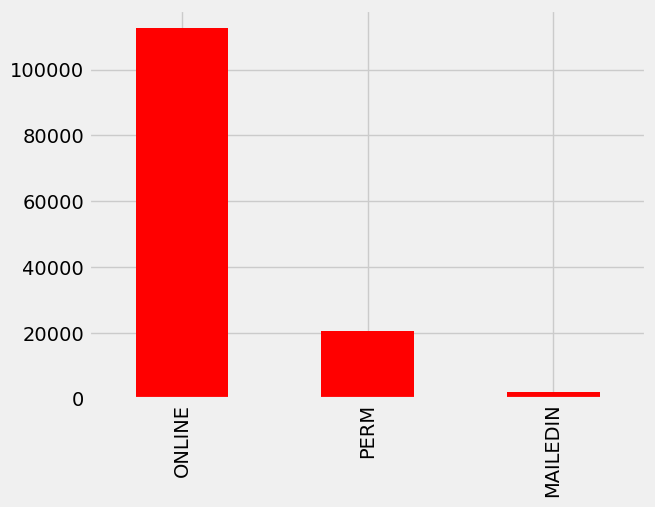

In [54]:
df['application_type'].value_counts().plot(kind="bar",color='red')

In [ ]:
#most people online

<Axes: ylabel='Frequency'>

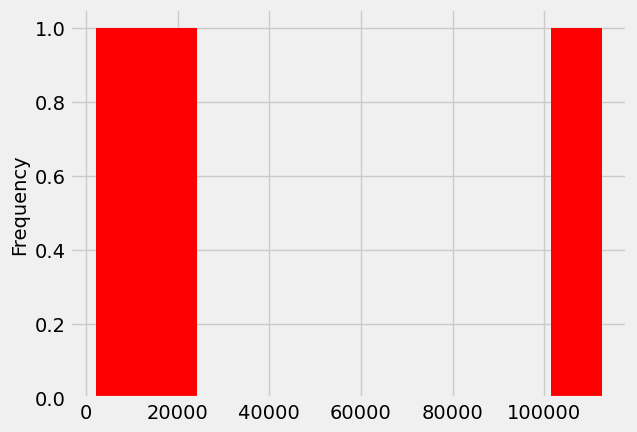

In [60]:
df['application_type'].value_counts().plot(kind='hist',color='red')

<Axes: xlabel='application_type', ylabel='count'>

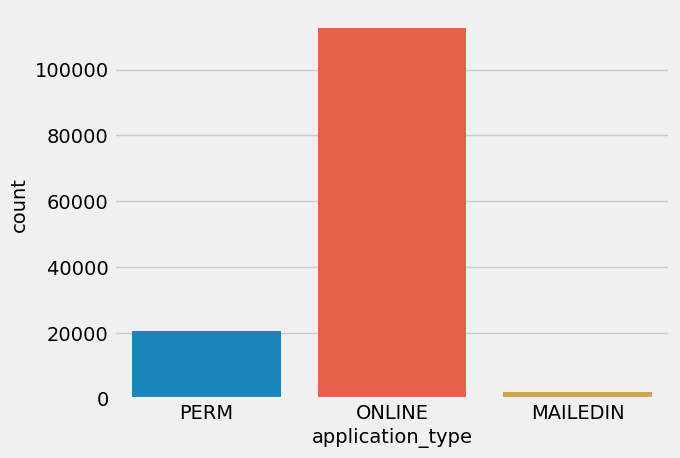

In [61]:
sns.countplot(data=df,x='application_type')

In [62]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=153)

In [65]:
df.us_economic_sector

0                            IT
1         Other Economic Sector
2                     Aerospace
3         Other Economic Sector
4                  Advanced Mfg
                  ...          
374357                      NaN
374358                      NaN
374359                      NaN
374360                      NaN
374361                      NaN
Name: us_economic_sector, Length: 374362, dtype: object

In [66]:
df.us_economic_sector_.describe()

count     129068
unique        17
top           IT
freq       52617
Name: us_economic_sector, dtype: object

In [67]:
economic_sector=df['us_economic_sector'].value_counts()

In [68]:
economic_sector

IT                       52617
Advanced Mfg             18749
Other Economic Sector    15798
Finance                   9224
Educational Services      9130
Health Care               6825
Retail                    4408
Aerospace                 4166
Hospitality               1926
Construction              1409
Automotive                1163
Energy                    1086
Transportation             949
Agribusiness               939
Biotechnology              456
Geospatial                 141
Homeland Security           82
Name: us_economic_sector, dtype: int64

In [69]:
df['us_economic_sector'].value_counts()

IT                       52617
Advanced Mfg             18749
Other Economic Sector    15798
Finance                   9224
Educational Services      9130
Health Care               6825
Retail                    4408
Aerospace                 4166
Hospitality               1926
Construction              1409
Automotive                1163
Energy                    1086
Transportation             949
Agribusiness               939
Biotechnology              456
Geospatial                 141
Homeland Security           82
Name: us_economic_sector, dtype: int64

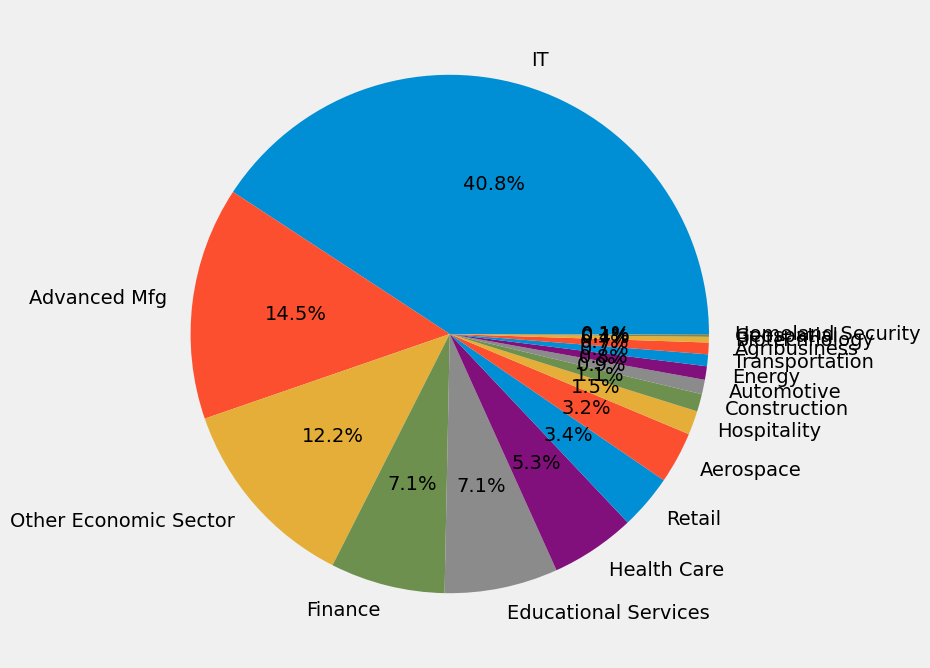

In [70]:
plt.figure(figsize=(8,8))
plt.pie(economic_sector,labels=economic_sector.index,autopct='%1.1f%%')
plt.show()

In [78]:
#insights for above chart you will get us visa iT
df['decision_date']=pd.to_datetime(df['decision_date'])
df['year']=df['decision_date'].dt.year

In [79]:
df['year']

0         2012
1         2011
2         2011
3         2011
4         2012
          ... 
374357    2016
374358    2016
374359    2016
374360    2016
374361    2016
Name: year, Length: 374362, dtype: int64

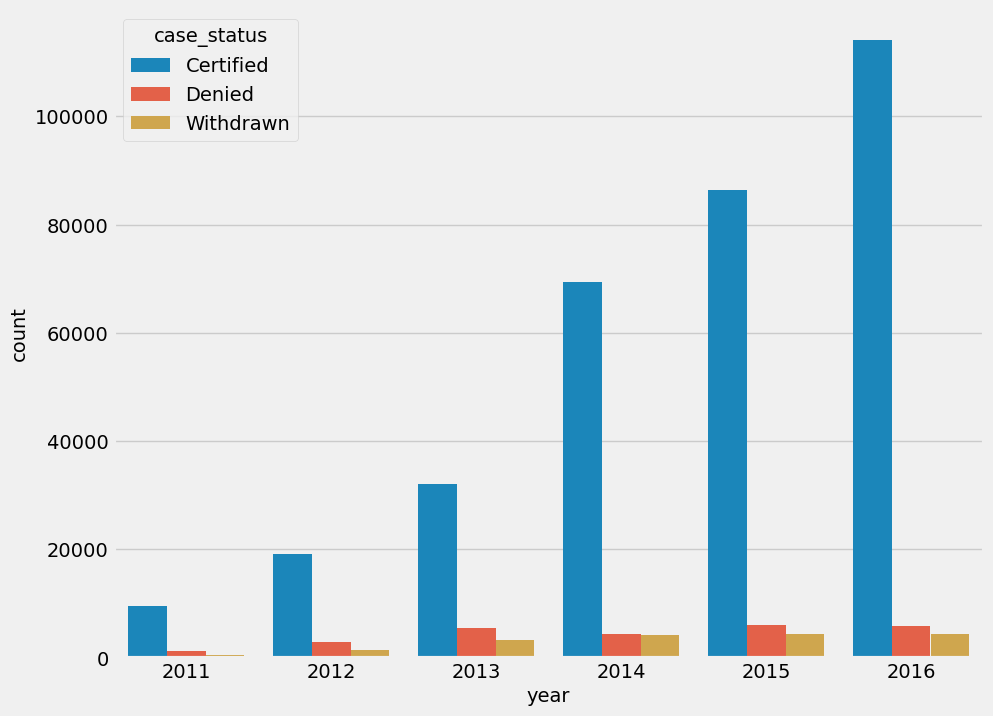

In [84]:
# fig,ax=plt.subplots(figsize=(10,8))
plt.figure(figsize=(10,8))
sns.countplot(x='year',hue='case_status',data=df)
plt.xlabel='Visa application year'
plt.ylabel="No of applications"
plt.show()

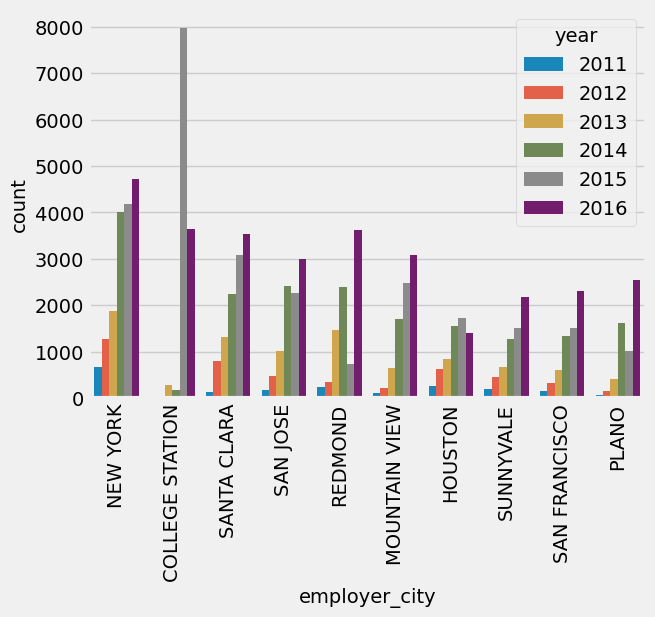

In [87]:

sns.countplot(x='employer_city',hue='year',data=df,order=df.employer_city.value_counts().iloc[:10].index)
plt.xlabel='Visa application year'
plt.ylabe='No of applications'
plt.xticks(rotation =90)
plt.show()           